Name | SEC |B.N.|
-----|---|----|
Mohamed Khaled Galloul | 2 | 15

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Loading & Preprocessing the Data

In [2]:
uni_data = pd.read_csv('univariateData.dat', names=['x1', 'y'])
multi_data = pd.read_csv('multivariateData.dat', names=['x1', 'x2', 'y'])
multi_data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
def scale(data):
    '''
    Scale data to have zero mean and standerd deviation of one.
    '''
    data = np.array(data, dtype=float) # make sure that the data is a numpy array of floats
    mean_list = []
    std_list = []
    
    for i in range(data.shape[1]):
        mean, std = np.mean(data[:,i]), np.std(data[:,i])
        data[:,i] = (data[:,i] - mean)/std
        mean_list.append(mean); std_list.append(std)
    
    return mean_list, std_list, data

# Scale all features and targets to have mean of '0' and std of '1' and save the mean and std for each them, 
# to be used later to unscale certain feature or the target.
mean_uni, std_uni, uni_data = scale(uni_data)
mean_multi, std_multi, multi_data = scale(multi_data)

In [4]:
# Adding the interception term 'x0' for both datasets
uni_data = np.c_[np.ones((uni_data.shape[0], 1)), uni_data]
multi_data = np.c_[np.ones((multi_data.shape[0], 1)), multi_data]
multi_data[:5,:]

array([[ 1.        ,  0.13141542, -0.22609337,  0.48089023],
       [ 1.        , -0.5096407 , -0.22609337, -0.08498338],
       [ 1.        ,  0.5079087 , -0.22609337,  0.23109745],
       [ 1.        , -0.74367706, -1.5543919 , -0.87639804],
       [ 1.        ,  1.27107075,  1.10220517,  1.61263744]])

In [5]:
# Split to train and test sets for both datasets by 80:20 ratio.

y_uni = uni_data[:,-1].reshape(-1, 1) # Convert y_uni to be (m, 1) matrix where m is number of samples
X_uni_train, X_uni_test, y_uni_train, y_uni_test = train_test_split(uni_data[:,:-1], y_uni, 
                                                                    test_size=0.2, random_state=0)

y_multi = multi_data[:,-1].reshape(-1, 1)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(multi_data[:,:-1], y_multi, 
                                                                    test_size=0.2, random_state=0)

In [6]:
y_uni_train.shape

(77, 1)

# Linear Regression Class

In [7]:
class LinearRegressor():
    def __init__(self, model_type="uni", n_iterations=1000, lr=0.01):
        
        # Initializing our model's weights
        if model_type == 'uni':
            self.w = np.random.randn(2,1)
        elif model_type == 'multi':
            self.w = np.random.randn(3, 1)
        
        self.lr = lr
        self.n_iterations = n_iterations

    def fit(self, X, y):
        
        self.X = X
        self.y = y
        self.m = X.shape[0]
        
        for i in range(self.n_iterations):
            self.gradient_descent()
    
    def predict(self, X_test):
        return np.dot(X_test, self.w)
    
    def compute_cost(self):
        cost = (1/self.m) * sum( (np.dot(self.X, self.w) - self.y)**2 )
        return float(cost)
        
    def gradient_descent(self):
        gradients = (2 / self.m) * np.dot(self.X.T, (np.dot(self.X,self.w) - self.y))
        self.w = self.w - self.lr * gradients
        
    def evaluate_performance(self, y, y_predicted):
        # Lets calculate Mean Absolute Error (MAE) which will be our evaluation metric.
        MAE = sum(np.abs(i-j) for i,j in zip(y,y_predicted) ) / float(len(y))
        return float(MAE)

# Univariate Linear Regression

In [8]:
model_1 = LinearRegressor()
model_1.fit(X_uni_train, y_uni_train)
y_uni_predicted = model_1.predict(X_uni_test)

print(f"The total training cost is: {model_1.compute_cost():0.2f}")
print(f"The MAE for the train set is: {model_1.evaluate_performance(y_uni_train, model_1.predict(X_uni_train)):0.2f}")
print(f"The MAE for the test set is: {model_1.evaluate_performance(y_uni_test, y_uni_predicted):0.2f}")

The total training cost is: 0.30
The MAE for the train set is: 0.40
The MAE for the test set is: 0.40


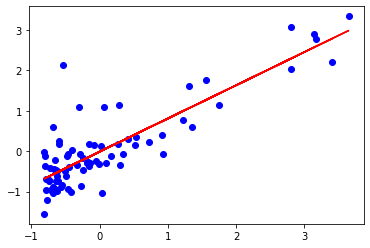

In [9]:
# Visualize the trainig data
plt.plot(X_uni_train[:,1], y_uni_train, 'bo');
plt.plot(X_uni_train[:,1], model_1.predict(X_uni_train), '-r');

# Multivariate Linear Regression

In [10]:
model_2 = LinearRegressor(model_type='multi', n_iterations=10000, lr=0.001)
model_2.fit(X_multi_train, y_multi_train)
y_multi_predicted = model_2.predict(X_multi_test)

print(f"The total training cost is: {model_2.compute_cost():0.2f}")
print(f"The MAE for the train set is: {model_2.evaluate_performance(y_multi_train, model_2.predict(X_multi_train)):0.2f}")
print(f"The MAE for the test set is: {model_2.evaluate_performance(y_multi_test, y_multi_predicted):0.2f}")

The total training cost is: 0.24
The MAE for the train set is: 0.39
The MAE for the test set is: 0.56


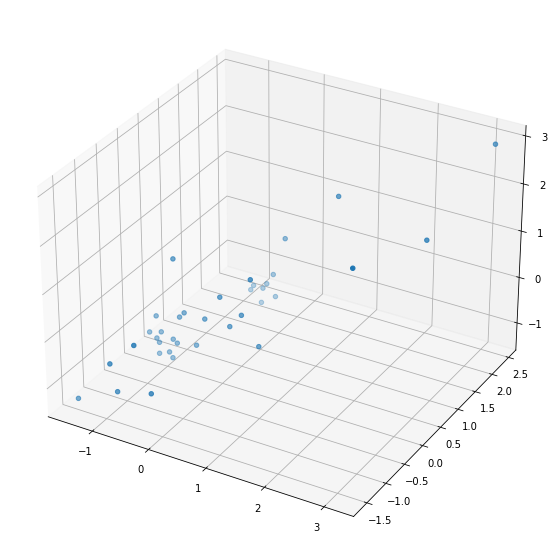

In [11]:
# Visualize the trainig data
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X_multi_train[:,1],X_multi_train[:,2], y_multi_train, 'bo');
# ax1.plot_surface(X_multi_train[:,1],X_multi_train[:,2], model_2.predict(X_multi_train));

In [12]:
model_2.w

array([[-0.02523498],
       [ 0.79985643],
       [-0.00969812]])

# BOUNS: Univariante Lasso regression
>  **Lasso regression** is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros. During training, the objective function become:

<img src="lasso_costfn.png" width="60%">

> So the hyperparameter alpha is used to penalize higher weights by increasing the cost by adding the regularization term hence, reduces the model's overfitting.

In [13]:
class LassoRegressor():
    def __init__(self, model_type="uni", n_iterations=100, lr=0.01, alpha=1):
        
        # Initializing our model's weights
        if model_type == 'uni':
            self.w = np.random.randn(2,1)
        elif model_type == 'multi':
            self.w = np.random.randn(3, 1)
        
        self.lr = lr
        self.n_iterations = n_iterations
        self.alpha = alpha

    def fit(self, X, y):
        
        self.X = X
        self.y = y
        self.m = X.shape[0]
        
        for i in range(self.n_iterations):
            self.gradient_descent()
    
    def predict(self, X_test):
        return np.dot(X_test, self.w)
    
    def compute_cost(self):
        cost = (1/self.m) * sum( (np.dot(self.X, self.w) - self.y)**2 ) + self.alpha * sum(np.abs(self.w[1:]))
        return float(cost)
        
    def gradient_descent(self):
        gradients = (2 / self.m) * np.dot(self.X.T, (np.dot(self.X,self.w) - self.y))
        self.w = self.w - self.lr * gradients
        
    def evaluate_performance(self, y, y_predicted):
        # Lets calculate Mean Absolute Error (MAE) which will be our evaluation metric.
        MAE = sum(np.abs(i-j) for i,j in zip(y,y_predicted) ) / float(len(y))
        return float(MAE)

In [14]:
model_3 = LassoRegressor()
model_3.fit(X_uni_train, y_uni_train)
y_uni_predicted = model_3.predict(X_uni_test)

print(f"The total training cost is: {model_3.compute_cost():0.2f}")
print(f"The MAE for the train set is: {model_3.evaluate_performance(y_uni_train, model_3.predict(X_uni_train)):0.2f}")
print(f"The MAE for the test set is: {model_3.evaluate_performance(y_uni_test, y_uni_predicted):0.2f}")

The total training cost is: 1.01
The MAE for the train set is: 0.41
The MAE for the test set is: 0.42


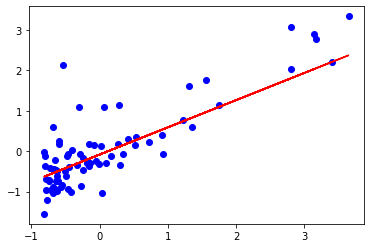

In [15]:
# Visualize the trainig data
plt.plot(X_uni_train[:,1], y_uni_train, 'bo');
plt.plot(X_uni_train[:,1], model_3.predict(X_uni_train), '-r');